In [1]:
import curvefitting as cf
import pandas as pd
import utilitiesPlotting as up
#import scikit

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


        mean    std    skew  kurtosis
magX -11.941  0.656   0.140     0.079
magY   5.704  0.480   4.830    75.889
magZ -29.964  0.623  -0.054    -0.040
accX   0.420  0.013  -0.129     1.594
accY   0.378  0.014   0.074     2.917
accZ   9.818  0.089 -13.486   189.699
gyrX   0.000  0.001   0.115     0.005
gyrY   0.000  0.004  27.965   899.562
gyrZ  -0.000  0.005 -25.989   711.860
Params: 
[90.30619733  0.99972212 39.13845789 88.82677808]


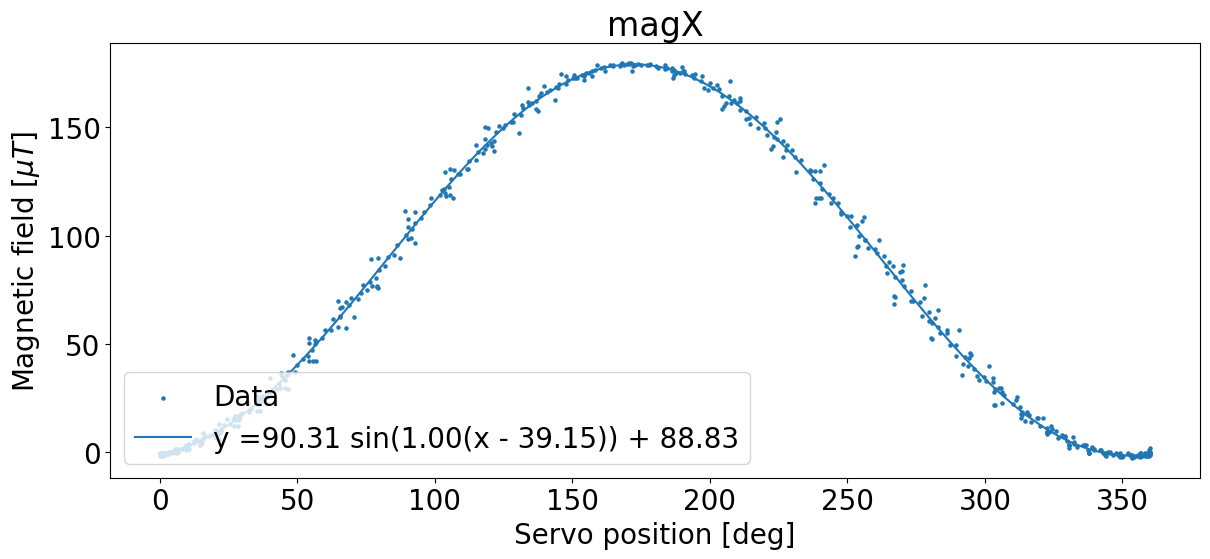

Params: 
[ 91.51063165   1.00062752 -81.8100581  -12.4489491 ]


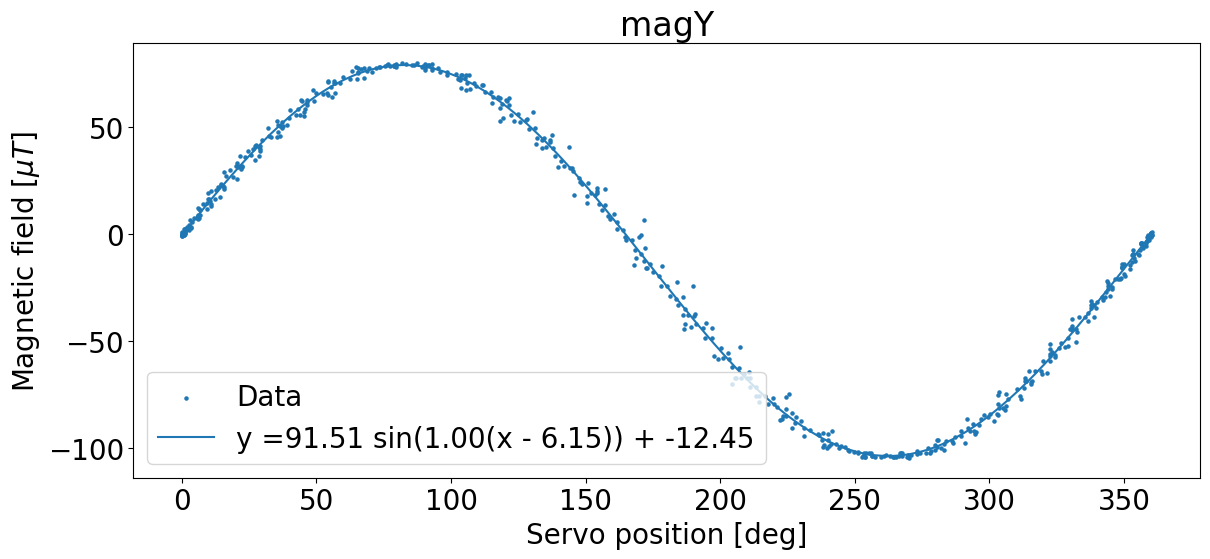

Params: 
[-5.91358575  1.00107382  0.97181087 -5.83269238]


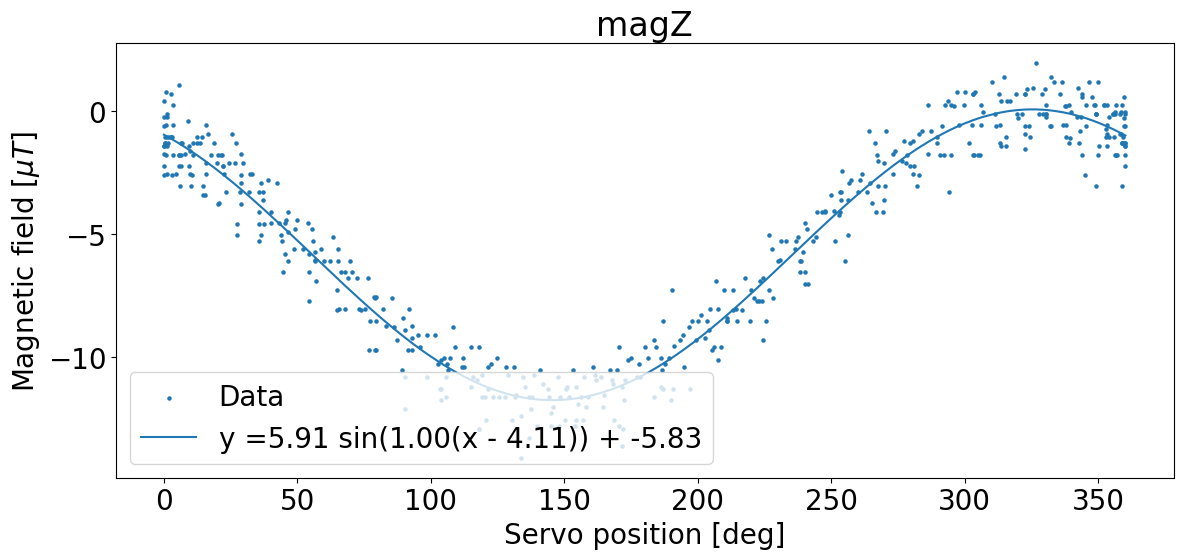

In [3]:
def estimate_sine_params(df_IMU, df_servo, saveFig = False, directory = None):
    df_mag_servo = df_servo
    
    df_mag_servo['magX'] = df_mag_servo['magX']  - df_IMU['magX'].mean() 
    df_mag_servo['magY'] = df_mag_servo['magY']  - df_IMU['magY'].mean() 
    df_mag_servo['magZ'] = df_mag_servo['magZ']  - df_IMU['magZ'].mean() 
    cf.fitMagnetometerData(df_mag_servo, saveFig = saveFig, directory = directory)


def print_performance_indexes():
    #should print RMSE, R2, etc :)
    return

def convertVel(num):
    bitstring = num.to_bytes(length=5, byteorder='big')
    manipulated = bitstring[-4:]
    return int.from_bytes(manipulated, byteorder='big', signed=True)

def laodTestData(filename, save = False):
    #Loads IMU measurments from csv and removes the obvious outliers (super spikes :)
    df = pd.read_csv(filename, sep = ',', header=0, index_col=False)

    #remove obvious outliers due to measurement noise
    df['time'] = (df['time'] - df['time'].iloc[0])
    df[['magX', 'magY', 'magZ']] = df[['magX', 'magY', 'magZ']][(df[['magX', 'magY', 'magZ']] < 500) & (df[['magX', 'magY', 'magZ']] > -500)].dropna()
    df[['accX', 'accY', 'accZ']] = df[['accX', 'accY', 'accZ']][(df[['accX', 'accY', 'accZ']] < 20) & (df[['accX', 'accY', 'accZ']] > -20)].dropna()

    #remove additional measurement noise
    df['accZ'] = df['accZ'][(df['accZ'] < 20) & (df['accZ'] > 8)].dropna()

    if {'servoPos', 'servoVel', 'servoCur'}.issubset(df.columns):
        df['servoPos'] = df['servoPos'][df['servoPos'] < 5000].dropna()

        for index, val in enumerate(df['servoVel']):
            df['servoVel'].iloc[index] = convertVel(val)

        for index, val in enumerate(df['servoCur']):
            df['servoCur'].iloc[index] = convertVel(val)

        df['servoVel'] = df['servoVel'] * 0.229 #rpm
        df['servoPos'] = df['servoPos'] * 0.088 #deg
        df['servoCur'] = df['servoCur'] * 2.69 #mA
    
    if save:
        df.to_csv('servoTestTranslates.csv')
        

    return df
                    
#MatchAndSaveMagPosData()
df_true_IMU = up.laodTestData("../projectThesisTest1/newCurrentMeas/woLoad/pureIMUdata2023-05-16 09%3A22%3A14.928527.csv") 
df_true_IMU = df_true_IMU.dropna()
df_servo = pd.read_csv("../AspenDataFiles/woLoad/NEWservoData2023-05-16woLoadTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False) 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, saveFig = False, directory = "../projectThesisTest1/newCurrentMeas/woLoad")

# With load


In [6]:
df_true_IMU = up.laodTestData("../projectThesisTest1/newCurrentMeas/wLoad/pureIMUdata2023-05-16 08%3A46%3A23.906719.csv")
df_true_IMU = df_true_IMU.dropna()
df_servo = pd.read_csv("../AspenDataFiles/wLoad/NEWservoDataWithLoadTranslatedOutliersRemoved.csv", sep = ',', header=0, index_col=False) 
df_servo = df_servo.dropna()
estimate_sine_params(df_true_IMU, df_servo, saveFig = True, directory="../projectThesisTest1/newCurrentMeas/wLoad")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


        mean    std    skew  kurtosis
magX -12.267  0.621  -0.080    -0.038
magY   8.426  0.524   3.409    47.731
magZ -27.706  0.826  16.009   535.049
accX   0.466  0.011   0.275    -0.119
accY   0.527  0.015   0.296     0.828
accZ   9.790  0.067 -17.966   341.289
gyrX   0.000  0.001   0.065     0.437
gyrY   0.000  0.003  31.971  1349.578
gyrZ  -0.000  0.005  -8.502   701.006
Params: 
[90.2014004   0.99836896 39.14018595 88.32468227]
Params: 
[ 92.01013949   1.00118729 -81.80410674 -12.11318548]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Params: 
[-6.31019593  1.01410679  1.03085513 -6.86138684]
